# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Import dependencies
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
import json
from citipy import citipy

from scipy import stats
from scipy.stats import pearsonr

# Grab API keys
from api_keys import weather_api_key

#Output to csv
output_data_file = "../output_data/weather.csv"

# Range of latitudes and longitudes
lat_r = (-90, 90)
lng_r = (-180, 180)

# set pass through count
count = 0
set1 = 1

## Generate Cities List

In [40]:
LL = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)


# Identify nearest city for each lat, lng combination
for LL in zip(lats, lngs):
    city = citipy.nearest_city(LL[0], LL[1]).city_name
    country = citipy.nearest_city(LL[0], LL[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))    

634
634


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
#Create a dataframe to store the data
cityweather_df = pd.DataFrame({'City': cities, 'Country': countries, 'Lat': "", 'Lng': "", 'Max Temp': "", 'Cloudiness': "",
                            'Humidity': "", 'Windspeed': "", 'Date': "",})

#Preview the dataframe
cityweather_df.head()

,City,Country,Lat,Lng,Max Temp,Cloudiness,Humidity,Windspeed,Date
0,chokwe,MZ,,,,,,,
1,port elizabeth,ZA,,,,,,,
2,barentsburg,SJ,,,,,,,
3,belushya guba,RU,,,,,,,
4,samarai,PG,,,,,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
# Variables to keep track of response number
record_n = 1
r_set = 1

#Add url
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#API call each city
print('''
-----------------------------
Retrieving Data
-----------------------------''')
for index, row in cityweather_df.iterrows(): 
    #Create the query url for the API call
    query_url = url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_n} of Set {r_set} | {response["name"]}')
        
        #Input data into the dataframe
        cityweather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cityweather_df.loc[index, 'Date'] = response['dt']
        cityweather_df.loc[index, 'Humidity'] = response['main']['humidity']
        cityweather_df.loc[index, 'Lat'] = response['coord']['lat']
        cityweather_df.loc[index, 'Lng'] = response['coord']['lon']
        cityweather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cityweather_df.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_n += 1
        
    except (KeyError, IndexError):
        print("City not found, skipping.")
    
    #If statement to handle the API call limits
    if record_n == 51:
        r_set += 1
        record_n = 1
        time.sleep(1)
        
print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')


-----------------------------
Retrieving Data
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Chokwé
Processing Weather Data for Record 2 of Set 1 | Port Elizabeth
City not found, skipping.
City not found, skipping.
Processing Weather Data for Record 3 of Set 1 | Samarai
Processing Weather Data for Record 4 of Set 1 | Punta Arenas
Processing Weather Data for Record 5 of Set 1 | Atuona
Processing Weather Data for Record 6 of Set 1 | Chapais
Processing Weather Data for Record 7 of Set 1 | Aberdeen
Processing Weather Data for Record 8 of Set 1 | Tocache
Processing Weather Data for Record 9 of Set 1 | Ushuaia
Processing Weather Data for Record 10 of Set 1 | Tabou
City not found, skipping.
Processing Weather Data for Record 11 of Set 1 | Puerto Ayora
Processing Weather Data for Record 12 of Set 1 | Lorengau
Processing Weather Data for Record 13 of Set 1 | Katobu
Processing Weather Data for Record 14 of Set 1 | Lebu
Processing Weather Data for Record 15 of Set 

Processing Weather Data for Record 34 of Set 3 | Boende
Processing Weather Data for Record 35 of Set 3 | Lundamo
Processing Weather Data for Record 36 of Set 3 | Tasiilaq
Processing Weather Data for Record 37 of Set 3 | Española
Processing Weather Data for Record 38 of Set 3 | Tuktoyaktuk
Processing Weather Data for Record 39 of Set 3 | Nabire
Processing Weather Data for Record 40 of Set 3 | Roald
Processing Weather Data for Record 41 of Set 3 | Ryazan
Processing Weather Data for Record 42 of Set 3 | Carinhanha
Processing Weather Data for Record 43 of Set 3 | Mareeba
Processing Weather Data for Record 44 of Set 3 | Charters Towers
Processing Weather Data for Record 45 of Set 3 | Makokou
Processing Weather Data for Record 46 of Set 3 | Lompoc
Processing Weather Data for Record 47 of Set 3 | Suba
Processing Weather Data for Record 48 of Set 3 | Dikson
Processing Weather Data for Record 49 of Set 3 | Soignies
Processing Weather Data for Record 50 of Set 3 | Mahébourg
Processing Weather Da

Processing Weather Data for Record 21 of Set 6 | Zhangaözen
Processing Weather Data for Record 22 of Set 6 | Nogliki
Processing Weather Data for Record 23 of Set 6 | Ayagoz
City not found, skipping.
Processing Weather Data for Record 24 of Set 6 | Puerto Escondido
Processing Weather Data for Record 25 of Set 6 | Gizo Government Station
Processing Weather Data for Record 26 of Set 6 | Grimma
Processing Weather Data for Record 27 of Set 6 | Ambulu
Processing Weather Data for Record 28 of Set 6 | Wanxian
Processing Weather Data for Record 29 of Set 6 | Caniço
Processing Weather Data for Record 30 of Set 6 | Arica
Processing Weather Data for Record 31 of Set 6 | Wanaka
City not found, skipping.
City not found, skipping.
Processing Weather Data for Record 32 of Set 6 | San Cristobal
Processing Weather Data for Record 33 of Set 6 | Mount Isa
Processing Weather Data for Record 34 of Set 6 | Abalak
Processing Weather Data for Record 35 of Set 6 | Polunochnoye
Processing Weather Data for Record

City not found, skipping.
Processing Weather Data for Record 6 of Set 9 | Leona Vicario
City not found, skipping.
Processing Weather Data for Record 7 of Set 9 | Nālūt
Processing Weather Data for Record 8 of Set 9 | Arlit
Processing Weather Data for Record 9 of Set 9 | Glendive
Processing Weather Data for Record 10 of Set 9 | Qaqortoq
Processing Weather Data for Record 11 of Set 9 | Bonnyville
Processing Weather Data for Record 12 of Set 9 | Corinto
Processing Weather Data for Record 13 of Set 9 | Gangāpur
Processing Weather Data for Record 14 of Set 9 | Wuchang
Processing Weather Data for Record 15 of Set 9 | Maragogi
Processing Weather Data for Record 16 of Set 9 | Shalakusha
City not found, skipping.
Processing Weather Data for Record 17 of Set 9 | Koulikoro
Processing Weather Data for Record 18 of Set 9 | Opuwo
Processing Weather Data for Record 19 of Set 9 | Xining
Processing Weather Data for Record 20 of Set 9 | Namatanai
Processing Weather Data for Record 21 of Set 9 | Margate
P

City not found, skipping.
Processing Weather Data for Record 39 of Set 11 | Tongliao
Processing Weather Data for Record 40 of Set 11 | Trat
Processing Weather Data for Record 41 of Set 11 | Chama
Processing Weather Data for Record 42 of Set 11 | Campbell River
Processing Weather Data for Record 43 of Set 11 | Hofn
Processing Weather Data for Record 44 of Set 11 | Bokoro
City not found, skipping.
Processing Weather Data for Record 45 of Set 11 | Leshukonskoye
Processing Weather Data for Record 46 of Set 11 | Khao Yoi
Processing Weather Data for Record 47 of Set 11 | Lafia
City not found, skipping.
Processing Weather Data for Record 48 of Set 11 | Tagusao
Processing Weather Data for Record 49 of Set 11 | Amapá
Processing Weather Data for Record 50 of Set 11 | Mehamn
Processing Weather Data for Record 1 of Set 12 | Plettenberg Bay
Processing Weather Data for Record 2 of Set 12 | The Valley
Processing Weather Data for Record 3 of Set 12 | Angoram
Processing Weather Data for Record 4 of Set

In [43]:
# clean data to remove skipped cities
cityweather_df['Max Temp'] = cityweather_df['Max Temp'].replace("", np.nan)
cityweather_df = cityweather_df.dropna()
# Save to csv
cityweather_df.to_csv(output_data_file, index=False)
cityweather_df.head()

,City,Country,Lat,Lng,Max Temp,Cloudiness,Humidity,Windspeed,Date
0,chokwe,MZ,-24.5333,32.9833,61.39,0,62,6.13,1627412320
1,port elizabeth,ZA,-33.918,25.5701,62.89,0,82,16.11,1627411994
4,samarai,PG,-10.6167,150.667,78.04,67,87,12.35,1627412100
5,punta arenas,CL,-53.15,-70.9167,42.91,75,93,9.22,1627411957
6,atuona,PF,-9.8,-139.033,78.10,35,65,18.9,1627411966


In [44]:
df3 = pd.read_csv(output_data_file)
df3.dtypes

City           object
Country        object
Lat           float64
Lng           float64
Max Temp      float64
Cloudiness      int64
Humidity        int64
Windspeed     float64
Date            int64
dtype: object

In [45]:
df3.describe()

,Lat,Lng,Max Temp,Cloudiness,Humidity,Windspeed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,20.425475,19.871764,70.707183,53.323944,69.628521,8.126849,1.627412e+09
std,33.011916,90.490630,14.669368,40.120374,21.436203,5.674156,1.932986e+02
min,-54.800000,-179.166700,33.710000,0.000000,5.000000,0.000000,1.627412e+09
25%,-7.483300,-58.291925,59.507500,11.000000,58.000000,3.837500,1.627412e+09
50%,25.085650,24.730700,72.230000,53.500000,75.000000,6.910000,1.627412e+09
75%,48.166675,100.276075,81.090000,98.000000,85.000000,11.082500,1.627412e+09
max,78.218600,179.316700,108.790000,100.000000,100.000000,30.150000,1.627413e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

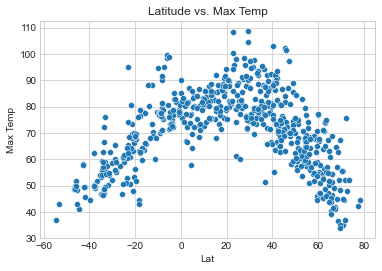

In [47]:
sns.scatterplot(data=df3, x="Lat", y="Max Temp").set_title(f'Latitude vs. Max Temp')
plt.savefig("../output_data/Fig1.png")
plt.show()


## Latitude vs. Humidity Plot

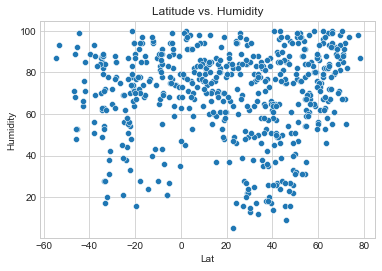

In [48]:
sns.scatterplot(data=df3, x="Lat", y="Humidity").set_title(f'Latitude vs. Humidity')
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

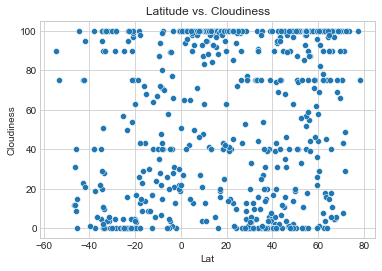

In [49]:
sns.scatterplot(data=df3, x="Lat", y="Cloudiness").set_title(f'Latitude vs. Cloudiness')
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

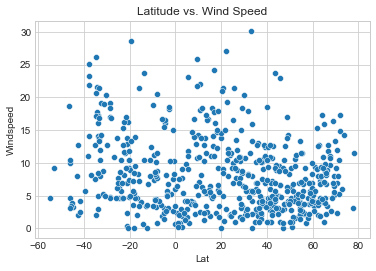

In [50]:
sns.scatterplot(data=df3, x="Lat", y="Windspeed").set_title(f'Latitude vs. Wind Speed')
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [51]:
north = df3.loc[df3['Lat']>=0]
south = df3.loc[df3['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


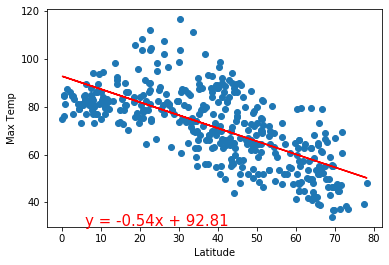

In [25]:
sns.set_theme(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Lat'],north['Max Temp'])
ax = sns.regplot(x="Lat", y="Max Temp", data=north, color='r', scatter_kws={"color": "teal"}, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title(f'Northern Latitude vs. Max Temp')
ax.legend()
# output r and p values
print(f'r={r_value}, p={p_value}')
plt.show()sns.set_theme(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Lat'],north['Max Temp'])
ax = sns.regplot(x="Lat", y="Max Temp", data=north, color='r', scatter_kws={"color": "teal"}, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title(f'Northern Latitude vs. Max Temp')
ax.legend()
# output r and p values
print(f'r={r_value}, p={p_value}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r=0.7972012444764679, p=6.994880863747323e-39


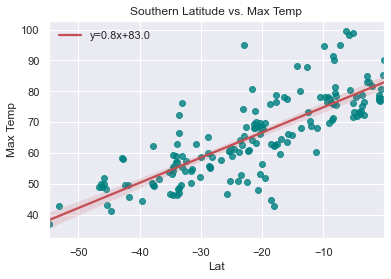

In [52]:
sns.set_theme(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Lat'],south['Max Temp'])
ax = sns.regplot(x="Lat", y="Max Temp", data=south, color='r', scatter_kws={"color": "teal"}, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title(f'Southern Latitude vs. Max Temp')
ax.legend()
# output r and p values
print(f'r={r_value}, p={p_value}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r=0.05723556955325727, p=0.2552258931071255


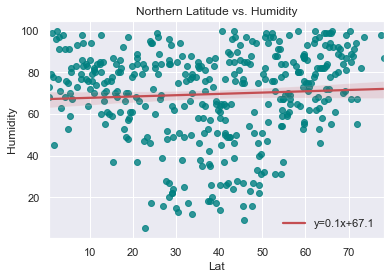

In [53]:

# Format regression plot with appropriate title, lables, and legend 
sns.set_theme(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Lat'],north['Humidity'])
ax = sns.regplot(x="Lat", y="Humidity", data=north, color='r', scatter_kws={"color": "teal"}, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title(f'Northern Latitude vs. Humidity')
ax.legend()
# output r and p values
print(f'r={r_value}, p={p_value}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r=0.031801721073509544, p=0.6796683478176759


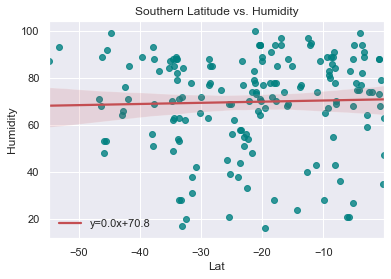

In [54]:
sns.set_theme(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Lat'],south['Humidity'])
ax = sns.regplot(x="Lat", y="Humidity", data=south, 
                 color='r', scatter_kws={"color": "teal"},
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title(f'Southern Latitude vs. Humidity')
ax.legend()
# output r and p values
print(f'r={r_value}, p={p_value}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r=-0.034111070524689556, p=0.49795404684372824


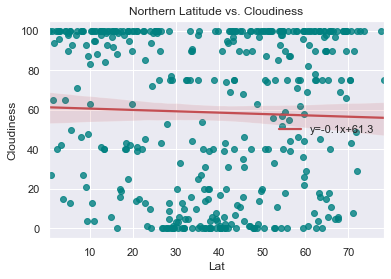

In [55]:

# Format regression plot with appropriate title, lables, and legend 
sns.set_theme(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Lat'],north['Cloudiness'])
ax = sns.regplot(x="Lat", y="Cloudiness", data=north, color='r', scatter_kws={"color": "teal"}, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title(f'Northern Latitude vs. Cloudiness')
ax.legend()
# output r and p values
print(f'r={r_value}, p={p_value}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


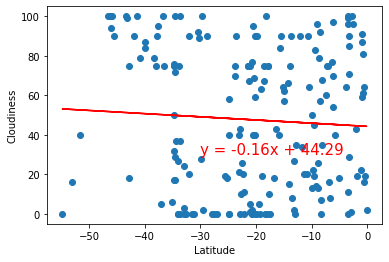

In [30]:
sns.set_theme(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Lat'],south['Cloudiness'])
ax = sns.regplot(x="Lat", y="Cloudiness", data=north, color='r', scatter_kws={"color": "teal"}, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title(f'Southern Latitude vs. Cloudiness')
ax.legend()
# output r and p values
print(f'r={r_value}, p={p_value}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r=-0.1323805182011564, p=0.00826668975973139


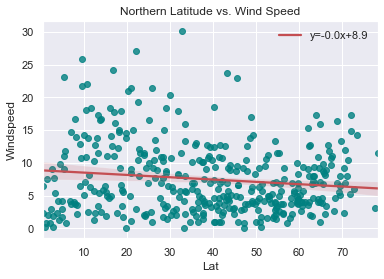

In [56]:
sns.set_theme(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Lat'],north['Windspeed'])
ax = sns.regplot(x="Lat", y="Windspeed", data=north, color='r', scatter_kws={"color": "teal"}, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title(f'Northern Latitude vs. Wind Speed')
ax.legend()
# output r and p values
print(f'r={r_value}, p={p_value}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r=-0.1993491966423844, p=0.008948916836735984


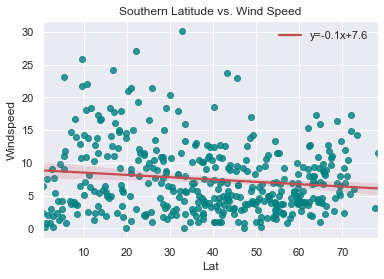

In [57]:
sns.set_theme(color_codes=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Lat'],south['Windspeed'])
ax = sns.regplot(x="Lat", y="Windspeed", data=north, color='r', scatter_kws={"color": "teal"}, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title(f'Southern Latitude vs. Wind Speed')
ax.legend()
# output r and p values
print(f'r={r_value}, p={p_value}')
plt.show()